In [12]:
import cv2
import numpy as np
import scipy.ndimage as ndi
from scipy import signal as sig
%matplotlib inline
import matplotlib.pyplot as plt
from google.colab import files
from google.colab.patches import cv2_imshow

uploaded = files.upload()
image=cv2.imread("Image.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
float_image = np.float32(gray_image)

Saving Image.png to Image (2).png


In [0]:
dest = cv2.cornerHarris(float_image, 2, 5, 0.07)
dest = cv2.dilate(dest, None)

copy_image = np.copy(image)
image[dest > 0.01*dest.max()] = [0, 0, 255]


In [0]:
def diff_x(gray_image):
  filter1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  return sig.convolve2d(gray_image, filter1, mode = 'same')

def diff_y(gray_image):
  filter2 = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
  return sig.convolve2d(gray_image, filter2, mode = 'same')


In [0]:
I_x = diff_x(gray_image)
I_y = diff_y(gray_image)

Ixx = ndi.gaussian_filter(I_x**2, sigma = 1)
Ixy = ndi.gaussian_filter(I_x*I_y, sigma = 1)
Iyy = ndi.gaussian_filter(I_y**2, sigma = 1)

k = 0.05 
trace_A = Ixx + Iyy
determinant_A = Ixx*Iyy - Ixy**2
harris_response = determinant_A - k*(trace_A**2)



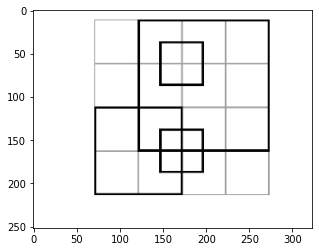

In [19]:

corner_image = np.copy(copy_image)
remaining_image = np.copy(copy_image)

for rowindex, response in enumerate(harris_response):
  for colindex, r in enumerate(response):
    if r>0:
      corner_image[rowindex, colindex] = [0,255,0]
    elif r<0:
      remaining_image[rowindex, colindex] = [255,0,0]

#original image
plt.imshow(copy_image)

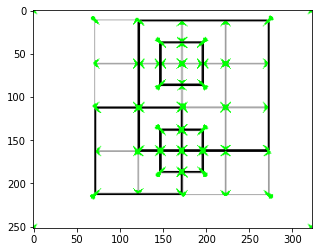

In [20]:
#corner image
plt.imshow(corner_image)

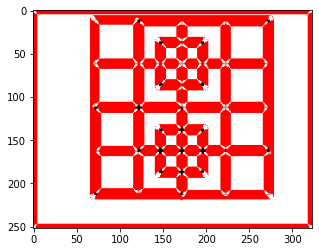

In [21]:
#remaining image
plt.imshow(remaining_image)